In [23]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats 

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
clinical_trial = pd.read_csv("data/clinicaltrial_data.csv")
clinical_trial.head()

# Read the Mouse and Drug Data and the Clinical Trial Data


# Combine the data into a single dataset


# Display the data table for preview



,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [24]:
mouse_drug =pd.read_csv ("data/mouse_drug_data.csv")
mouse_drug.head()

,Mouse ID,Drug
0,f234,Stelasyn
1,x402,Stelasyn
2,a492,Stelasyn
3,w540,Stelasyn
4,v764,Stelasyn


In [25]:
trial_df= pd.merge(clinical_trial, mouse_drug, how='outer', on='Mouse ID')
trial_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


In [26]:
drug_trial_df = trial_df.loc [(trial_df["Drug"] == "Capomulin") | (trial_df["Drug"] == "Infubinol") | (trial_df["Drug"] == "Ketapril") | (trial_df["Drug"] == "Placebo"), :]
drug_trial_df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


## Tumor Response to Treatment

In [27]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
# Convert to DataFrame
# Preview DataFrame
Tumor_group_df = drug_trial_df.groupby(['Drug','Timepoint'])
Tumor_sem_df = pd.DataFrame(Tumor_group_df ["Tumor Volume (mm3)"].sem())
Tumor_sem_df.reset_index(inplace=True)
Tumor_sem_df.head()



,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [12]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint

# Convert to DataFrame

# Preview DataFrame
Capomulin_yerr_df=Tumor_sem_df.loc['Capomulin',["Tumor Volume (mm3)"]]
Capomulin_yerr=Capomulin_yerr_df.iloc[:, 0].values
Capomulin_yerr



array([0.        , 0.44859285, 0.70268437, 0.83861725, 0.90973069,
       0.88164215, 0.93445951, 1.05224089, 1.22360839, 1.22397745])

In [13]:
Infubinol_yerr_df=Tumor_sem_df.loc['Infubinol',["Tumor Volume (mm3)"]]
Infubinol_yerr= Infubinol_yerr_df.iloc[:, 0].values
Infubinol_yerr

array([0.        , 0.2351023 , 0.28234591, 0.357705  , 0.47620951,
       0.55031457, 0.63106108, 0.98415494, 1.05521965, 1.14442738])

In [14]:
Ketapril_yerr_df=Tumor_sem_df.loc['Ketapril',["Tumor Volume (mm3)"]]
Ketapril_yerr= Ketapril_yerr_df.iloc[:, 0].values
Ketapril_yerr

array([0.        , 0.26481852, 0.35742126, 0.58026797, 0.72648382,
       0.75541275, 0.93412087, 1.12786718, 1.15844889, 1.45318648])

In [15]:
Placebo_yerr_df=Tumor_sem_df.loc['Placebo',["Tumor Volume (mm3)"]]
Placebo_yerr= Placebo_yerr_df.iloc[:, 0].values
Placebo_yerr

array([0.        , 0.21809078, 0.40206381, 0.61446144, 0.83960917,
       1.03487199, 1.21823118, 1.2874806 , 1.37063404, 1.3517256 ])

In [18]:
Tumor_mean_df = pd.DataFrame(Tumor_group_df ["Tumor Volume (mm3)"].mean())
Tumor_mean_df.reset_index(inplace=True)
Tumor_mean_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [28]:
Capomulin_df=Tumor_mean_df.loc[Tumor_mean_df["Drug"]=="Capomulin",:]
Capomulin_df
rename_Capomulin_df = Capomulin_df.rename(columns={"Tumor Volume (mm3)":"Capomulin"})
rename_Capomulin_df.head()

,Drug,Timepoint,Capomulin
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [29]:
Infubinol_df=Tumor_mean_df.loc[Tumor_mean_df["Drug"]=="Infubinol",:]
Infubinol_df
rename_Infubinol_df = Infubinol_df.rename(columns={"Tumor Volume (mm3)":"Infubinol"})
rename_Infubinol_df.head()

,Drug,Timepoint,Infubinol
10,Infubinol,0,45.000000
11,Infubinol,5,47.062001
12,Infubinol,10,49.403909
13,Infubinol,15,51.296397
14,Infubinol,20,53.197691


In [30]:
Ketapril_df=Tumor_mean_df.loc[Tumor_mean_df["Drug"]=="Ketapril",:]
Ketapril_df
rename_Ketapril_df = Ketapril_df.rename(columns={"Tumor Volume (mm3)":"Ketapril"})
rename_Ketapril_df.head()

,Drug,Timepoint,Ketapril
20,Ketapril,0,45.000000
21,Ketapril,5,47.389175
22,Ketapril,10,49.582269
23,Ketapril,15,52.399974
24,Ketapril,20,54.920935


In [31]:
Placebo_df=Tumor_mean_df.loc[Tumor_mean_df["Drug"]=="Placebo",:]
Placebo_df
rename_Placebo_df = Placebo_df.rename(columns={"Tumor Volume (mm3)":"Placebo"})
rename_Placebo_df.head()

,Drug,Timepoint,Placebo
30,Placebo,0,45.000000
31,Placebo,5,47.125589
32,Placebo,10,49.423329
33,Placebo,15,51.359742
34,Placebo,20,54.364417


In [32]:
meger1_df=pd.merge(rename_Capomulin_df, rename_Infubinol_df, on="Timepoint")
meger1_df.head()

,Drug_x,Timepoint,Capomulin,Drug_y,Infubinol
0,Capomulin,0,45.000000,Infubinol,45.000000
1,Capomulin,5,44.266086,Infubinol,47.062001
2,Capomulin,10,43.084291,Infubinol,49.403909
3,Capomulin,15,42.064317,Infubinol,51.296397
4,Capomulin,20,40.716325,Infubinol,53.197691


In [33]:
meger2_df=pd.merge(rename_Ketapril_df, rename_Placebo_df, on="Timepoint")
meger2_df.head()

,Drug_x,Timepoint,Ketapril,Drug_y,Placebo
0,Ketapril,0,45.000000,Placebo,45.000000
1,Ketapril,5,47.389175,Placebo,47.125589
2,Ketapril,10,49.582269,Placebo,49.423329
3,Ketapril,15,52.399974,Placebo,51.359742
4,Ketapril,20,54.920935,Placebo,54.364417


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [34]:
# Minor Data Munging to Re-Format the Data Frames

# Preview that Reformatting worked
merge3_df = pd.merge(meger1_df, meger2_df, on="Timepoint")
merge3_df.head()


,Drug_x_x,Timepoint,Capomulin,Drug_y_x,Infubinol,Drug_x_y,Ketapril,Drug_y_y,Placebo
0,Capomulin,0,45.000000,Infubinol,45.000000,Ketapril,45.000000,Placebo,45.000000
1,Capomulin,5,44.266086,Infubinol,47.062001,Ketapril,47.389175,Placebo,47.125589
2,Capomulin,10,43.084291,Infubinol,49.403909,Ketapril,49.582269,Placebo,49.423329
3,Capomulin,15,42.064317,Infubinol,51.296397,Ketapril,52.399974,Placebo,51.359742
4,Capomulin,20,40.716325,Infubinol,53.197691,Ketapril,54.920935,Placebo,54.364417


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


In [36]:
tumor_response_df=merge3_df[["Timepoint", "Capomulin", "Infubinol", "Ketapril", "Placebo"]]
tumor_response_df

,Timepoint,Capomulin,Infubinol,Ketapril,Placebo
0,0,45.000000,45.000000,45.000000,45.000000
1,5,44.266086,47.062001,47.389175,47.125589
2,10,43.084291,49.403909,49.582269,49.423329
3,15,42.064317,51.296397,52.399974,51.359742
4,20,40.716325,53.197691,54.920935,54.364417
5,25,39.939528,55.715252,57.678982,57.482574
6,30,38.769339,58.299397,60.994507,59.809063
7,35,37.816839,60.742461,63.371686,62.420615
8,40,36.958001,63.162824,66.068580,65.052675
9,45,36.236114,65.755562,70.662958,68.084082


In [37]:
tumor_response_df['Timepoint'] = tumor_response_df['Timepoint'].astype(float)
tumor_response_df.dtypes

Timepoint    float64
Capomulin    float64
Infubinol    float64
Ketapril     float64
Placebo      float64
dtype: object

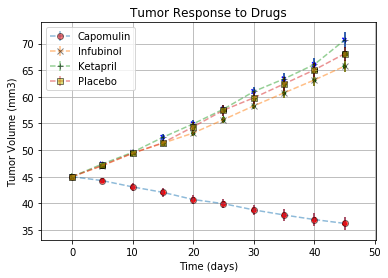

In [52]:
# Generate the Plot (with Error Bars)

# Save the Figure
ax=tumor_response_df.plot(kind='scatter', x='Timepoint',y='Capomulin', linestyle='--', color='red', marker='o', yerr=Capomulin_yerr);
ax.errorbar(x=tumor_response_df['Timepoint'],y=tumor_response_df['Capomulin'], yerr=Capomulin_yerr, fmt='o', mfc='r', mec='k', ms=6, mew=1, linestyle='--',alpha=0.5, label="Capomulin" )
tumor_response_df.plot(kind='scatter', x='Timepoint', y='Infubinol', linestyle='--', color='DarkGreen', marker='d', yerr = Infubinol_yerr, ax=ax);
ax.errorbar(x=tumor_response_df['Timepoint'],y=tumor_response_df['Infubinol'], yerr=Infubinol_yerr, fmt='x', mfc='b', mec='k', ms=6, mew=1, linestyle='--', alpha=0.5, label="Infubinol")
tumor_response_df.plot(kind='scatter', x='Timepoint', y='Ketapril', linestyle='--', color='blue', marker='x',  yerr = Ketapril_yerr,  ax=ax);
ax.errorbar(x=tumor_response_df['Timepoint'],y=tumor_response_df['Ketapril'], yerr=Ketapril_yerr, fmt='+', mfc='g', mec='k', ms=6, mew=1, linestyle='--', alpha=0.5, label="Ketapril")
tumor_response_df.plot(kind='scatter', x='Timepoint', y='Placebo', linestyle='--', color='black', marker='s',  yerr = Placebo_yerr,  ax=ax);
ax.errorbar(x=tumor_response_df['Timepoint'],y=tumor_response_df['Placebo'], yerr=Placebo_yerr, fmt='s', mfc='y', mec='k', ms=6, mew=1, linestyle='--', alpha=0.5, label="Placebo")
xlim = ax.get_xlim()
factor = 0.1 
new_xlim = (xlim[0] + xlim[1])/2 + np.array((-0.5, 0.5)) * (xlim[1] - xlim[0]) * (1 + factor) 
ax.set_xlim(new_xlim)
ax.grid()
ax.set_xlabel("Time (days)")
ax.set_ylabel("Tumor Volume (mm3)")
ax.set_title("Tumor Response to Drugs")
legend = ax.legend(loc='best', shadow=True)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels )
plt.savefig("tumor_response_to_treatment.png")
plt.show()

#plot

![Tumor Response to Treatment](../Images/treatment.png)

## Metastatic Response to Treatment

In [ ]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 

# Convert to DataFrame

# Preview DataFrame


In [39]:
Metastasis_mean_df = pd.DataFrame(Tumor_group_df ["Metastatic Sites"].mean())
Metastasis_mean_df.reset_index(inplace=True)
Metastasis_mean_df.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [41]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 

# Convert to DataFrame

# Preview DataFrame

Capomulin_df1=Metastasis_mean_df.loc[Metastasis_mean_df["Drug"]=="Capomulin",:]
Capomulin_df1
rename_Capomulin_df1 = Capomulin_df1.rename(columns={"Metastatic Sites":"Capomulin"})
rename_Capomulin_df1.head()


,Drug,Timepoint,Capomulin
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [42]:
Infubinol_df1=Metastasis_mean_df.loc[Metastasis_mean_df["Drug"]=="Infubinol",:]
Infubinol_df1
rename_Infubinol_df1 = Infubinol_df1.rename(columns={"Metastatic Sites":"Infubinol"})
rename_Infubinol_df1.head()

,Drug,Timepoint,Infubinol
10,Infubinol,0,0.000000
11,Infubinol,5,0.280000
12,Infubinol,10,0.666667
13,Infubinol,15,0.904762
14,Infubinol,20,1.050000


In [43]:
Ketapril_df1=Metastasis_mean_df.loc[Metastasis_mean_df["Drug"]=="Ketapril",:]
Ketapril_df1
rename_Ketapril_df1 = Ketapril_df1.rename(columns={"Metastatic Sites":"Ketapril"})
rename_Ketapril_df1.head()

,Drug,Timepoint,Ketapril
20,Ketapril,0,0.000000
21,Ketapril,5,0.304348
22,Ketapril,10,0.590909
23,Ketapril,15,0.842105
24,Ketapril,20,1.210526


In [44]:
Placebo_df1=Metastasis_mean_df.loc[Metastasis_mean_df["Drug"]=="Placebo",:]
Placebo_df1
rename_Placebo_df1 = Placebo_df1.rename(columns={"Metastatic Sites":"Placebo"})
rename_Placebo_df1.head()

,Drug,Timepoint,Placebo
30,Placebo,0,0.000000
31,Placebo,5,0.375000
32,Placebo,10,0.833333
33,Placebo,15,1.250000
34,Placebo,20,1.526316


In [45]:
meger1_df1=pd.merge(rename_Capomulin_df1, rename_Infubinol_df1, on="Timepoint")
meger1_df1.head()

,Drug_x,Timepoint,Capomulin,Drug_y,Infubinol
0,Capomulin,0,0.000000,Infubinol,0.000000
1,Capomulin,5,0.160000,Infubinol,0.280000
2,Capomulin,10,0.320000,Infubinol,0.666667
3,Capomulin,15,0.375000,Infubinol,0.904762
4,Capomulin,20,0.652174,Infubinol,1.050000


In [46]:
meger2_df1=pd.merge(rename_Ketapril_df1, rename_Placebo_df1, on="Timepoint")
meger2_df1.head()

,Drug_x,Timepoint,Ketapril,Drug_y,Placebo
0,Ketapril,0,0.000000,Placebo,0.000000
1,Ketapril,5,0.304348,Placebo,0.375000
2,Ketapril,10,0.590909,Placebo,0.833333
3,Ketapril,15,0.842105,Placebo,1.250000
4,Ketapril,20,1.210526,Placebo,1.526316


In [47]:
merge3_df1 = pd.merge(meger1_df1, meger2_df1, on="Timepoint")
merge3_df1.head()

,Drug_x_x,Timepoint,Capomulin,Drug_y_x,Infubinol,Drug_x_y,Ketapril,Drug_y_y,Placebo
0,Capomulin,0,0.000000,Infubinol,0.000000,Ketapril,0.000000,Placebo,0.000000
1,Capomulin,5,0.160000,Infubinol,0.280000,Ketapril,0.304348,Placebo,0.375000
2,Capomulin,10,0.320000,Infubinol,0.666667,Ketapril,0.590909,Placebo,0.833333
3,Capomulin,15,0.375000,Infubinol,0.904762,Ketapril,0.842105,Placebo,1.250000
4,Capomulin,20,0.652174,Infubinol,1.050000,Ketapril,1.210526,Placebo,1.526316


In [48]:
Metastatic_change_df=merge3_df1[["Timepoint", "Capomulin", "Infubinol", "Ketapril", "Placebo"]]
Metastatic_change_df.head()

,Timepoint,Capomulin,Infubinol,Ketapril,Placebo
0,0,0.000000,0.000000,0.000000,0.000000
1,5,0.160000,0.280000,0.304348,0.375000
2,10,0.320000,0.666667,0.590909,0.833333
3,15,0.375000,0.904762,0.842105,1.250000
4,20,0.652174,1.050000,1.210526,1.526316


In [50]:
Metastasis_sem_df = pd.DataFrame(Tumor_group_df ["Metastatic Sites"].sem())
Metastasis_sem_df.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [49]:
Metastatic_change_df['Timepoint'] = Metastatic_change_df['Timepoint'].astype(float)
Metastatic_change_df.dtypes

Timepoint    float64
Capomulin    float64
Infubinol    float64
Ketapril     float64
Placebo      float64
dtype: object

In [ ]:
# Minor Data Munging to Re-Format the Data Frames

# Preview that Reformatting worked


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


In [53]:
Metastasis_sem_df = pd.DataFrame(Tumor_group_df ["Metastatic Sites"].sem())
Metastasis_sem_df.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [54]:
Capomulin_yerr_df1=Metastasis_sem_df.loc['Capomulin',["Metastatic Sites"]]
Capomulin_yerr1=Capomulin_yerr_df1.iloc[:, 0].values
Capomulin_yerr1

array([0.        , 0.07483315, 0.12543258, 0.1320477 , 0.16162094,
       0.18181818, 0.17294359, 0.16949586, 0.17561037, 0.20259093])

In [55]:
Infubinol_yerr_df=Metastasis_sem_df.loc['Infubinol',["Metastatic Sites"]]
Infubinol_yerr1= Infubinol_yerr_df.iloc[:, 0].values
Infubinol_yerr1

array([0.        , 0.09165151, 0.15936381, 0.19401475, 0.23480115,
       0.26575279, 0.22782255, 0.22473329, 0.31446604, 0.30932024])

In [56]:
Ketapril_yerr_df1=Metastasis_sem_df.loc['Ketapril',["Metastatic Sites"]]
Ketapril_yerr1=Ketapril_yerr_df1.iloc[:, 0].values
Ketapril_yerr1

array([0.        , 0.09810019, 0.1420184 , 0.19138091, 0.23667961,
       0.28827503, 0.34746723, 0.36141782, 0.31572542, 0.27872199])

In [57]:
Placebo_yerr_df1=Metastasis_sem_df.loc['Placebo',["Metastatic Sites"]]
Placebo_yerr1=Placebo_yerr_df1.iloc[:, 0].values
Placebo_yerr1

array([0.        , 0.10094661, 0.11526068, 0.19022148, 0.23406428,
       0.26388762, 0.30026443, 0.34141179, 0.2972942 , 0.30424001])

<Figure size 1440x216 with 0 Axes>

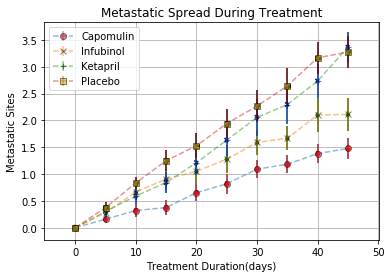

In [59]:
# Generate the Plot (with Error Bars)

# Save the Figure

# Show the Figure
plt.figure(figsize=(20,3))
ax=Metastatic_change_df.plot(kind='scatter', x='Timepoint',y='Capomulin', linestyle='--', color='red', marker='o', yerr=Capomulin_yerr1);
ax.errorbar(x=Metastatic_change_df['Timepoint'],y=Metastatic_change_df['Capomulin'], yerr=Capomulin_yerr1, fmt='o', mfc='r', mec='k', ms=6, mew=1, linestyle='--',alpha=0.5, label="Capomulin" )
Metastatic_change_df.plot(kind='scatter', x='Timepoint', y='Infubinol', linestyle='--', color='DarkGreen', marker='d', yerr = Infubinol_yerr1, ax=ax);
ax.errorbar(x=Metastatic_change_df['Timepoint'],y=Metastatic_change_df['Infubinol'], yerr=Infubinol_yerr1, fmt='x', mfc='b', mec='k', ms=6, mew=1, linestyle='--', alpha=0.5, label="Infubinol")
Metastatic_change_df.plot(kind='scatter', x='Timepoint', y='Ketapril', linestyle='--', color='blue', marker='x',  yerr = Ketapril_yerr1,  ax=ax);
ax.errorbar(x=Metastatic_change_df['Timepoint'],y=Metastatic_change_df['Ketapril'], yerr=Ketapril_yerr1, fmt='+', mfc='g', mec='k', ms=6, mew=1, linestyle='--', alpha=0.5, label="Ketapril")
Metastatic_change_df.plot(kind='scatter', x='Timepoint', y='Placebo', linestyle='--', color='black', marker='s',  yerr = Placebo_yerr1,  ax=ax);
ax.errorbar(x=Metastatic_change_df['Timepoint'],y=Metastatic_change_df['Placebo'], yerr=Placebo_yerr1, fmt='s', mfc='y', mec='k', ms=6, mew=1, linestyle='--', alpha=0.5, label="Placebo")
xlim = ax.get_xlim()
factor = 0.1 
new_xlim = (xlim[0] + xlim[1])/2 + np.array((-0.5, 0.5)) * (xlim[1] - xlim[0]) * (1 + factor) 
ax.set_xlim(new_xlim)

ax.grid()
ax.set_xlabel("Treatment Duration(days)")
ax.set_ylabel("Metastatic Sites")
ax.set_title("Metastatic Spread During Treatment")
legend = ax.legend(loc='best', shadow=True)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels )
plt.savefig("Metastatic_spread_during_treatment.png")
plt.show()


![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

In [ ]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)

# Convert to DataFrame

# Preview DataFrame


In [60]:
mice_count_df=pd.DataFrame(Tumor_group_df["Mouse ID"].count())
mice_count_df.reset_index(inplace=True)
mice_count_df.head()

,Drug,Timepoint,Mouse ID
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [62]:

Infubinol_df2=mice_count_df.loc[mice_count_df["Drug"]=="Infubinol",:]
Infubinol_df2
rename_Infubinol_df2 = Infubinol_df2.rename(columns={"Mouse ID":"Infubinol"})
rename_Infubinol_df2.head()

,Drug,Timepoint,Infubinol
10,Infubinol,0,25
11,Infubinol,5,25
12,Infubinol,10,21
13,Infubinol,15,21
14,Infubinol,20,20


In [64]:
Ketapril_df2=mice_count_df.loc[mice_count_df["Drug"]=="Ketapril",:]
Ketapril_df2
rename_Ketapril_df2 = Ketapril_df2.rename(columns={"Mouse ID":"Ketapril"})
rename_Ketapril_df2.head()

,Drug,Timepoint,Ketapril
20,Ketapril,0,25
21,Ketapril,5,23
22,Ketapril,10,22
23,Ketapril,15,19
24,Ketapril,20,19


In [65]:
Placebo_df2=mice_count_df.loc[mice_count_df["Drug"]=="Placebo",:]
Placebo_df2
rename_Placebo_df2 = Placebo_df2.rename(columns={"Mouse ID":"Placebo"})
rename_Placebo_df2.head()

,Drug,Timepoint,Placebo
30,Placebo,0,25
31,Placebo,5,24
32,Placebo,10,24
33,Placebo,15,20
34,Placebo,20,19


In [66]:

meger1_df2=pd.merge(rename_Capomulin_df2, rename_Infubinol_df2, on="Timepoint")
meger1_df2.head()

,Drug_x,Timepoint,Capomulin,Drug_y,Infubinol
0,Capomulin,0,25,Infubinol,25
1,Capomulin,5,25,Infubinol,25
2,Capomulin,10,25,Infubinol,21
3,Capomulin,15,24,Infubinol,21
4,Capomulin,20,23,Infubinol,20


In [67]:
meger2_df2=pd.merge(rename_Ketapril_df2, rename_Placebo_df2, on="Timepoint")
meger2_df2.head()

,Drug_x,Timepoint,Ketapril,Drug_y,Placebo
0,Ketapril,0,25,Placebo,25
1,Ketapril,5,23,Placebo,24
2,Ketapril,10,22,Placebo,24
3,Ketapril,15,19,Placebo,20
4,Ketapril,20,19,Placebo,19


In [68]:

merge3_df2 = pd.merge(meger1_df2, meger2_df2, on="Timepoint")
merge3_df2.head()

,Drug_x_x,Timepoint,Capomulin,Drug_y_x,Infubinol,Drug_x_y,Ketapril,Drug_y_y,Placebo
0,Capomulin,0,25,Infubinol,25,Ketapril,25,Placebo,25
1,Capomulin,5,25,Infubinol,25,Ketapril,23,Placebo,24
2,Capomulin,10,25,Infubinol,21,Ketapril,22,Placebo,24
3,Capomulin,15,24,Infubinol,21,Ketapril,19,Placebo,20
4,Capomulin,20,23,Infubinol,20,Ketapril,19,Placebo,19


In [69]:
survive_rate_df=merge3_df2[["Timepoint", "Capomulin", "Infubinol", "Ketapril", "Placebo"]]
survive_rate_df.head()

,Timepoint,Capomulin,Infubinol,Ketapril,Placebo
0,0,25,25,25,25
1,5,25,25,23,24
2,10,25,21,22,24
3,15,24,21,19,20
4,20,23,20,19,19


In [70]:
# Minor Data Munging to Re-Format the Data Frames

# Preview the Data Frame


survive_rate_df["Capomulin_percent"]=survive_rate_df["Capomulin"]/survive_rate_df["Capomulin"].iloc[0] * 100
survive_rate_df["Infubinol_percent"]=survive_rate_df["Infubinol"]/survive_rate_df["Infubinol"].iloc[0] * 100
survive_rate_df["Ketapril_percent"]=survive_rate_df["Ketapril"]/survive_rate_df["Ketapril"].iloc[0] * 100
survive_rate_df["Placebo_percent"]=survive_rate_df["Placebo"]/survive_rate_df["Placebo"].iloc[0] * 100
survive_rate_df


,Timepoint,Capomulin,Infubinol,Ketapril,Placebo,Capomulin_percent,Infubinol_percent,Ketapril_percent,Placebo_percent
0,0,25,25,25,25,100.0,100.0,100.0,100.0
1,5,25,25,23,24,100.0,100.0,92.0,96.0
2,10,25,21,22,24,100.0,84.0,88.0,96.0
3,15,24,21,19,20,96.0,84.0,76.0,80.0
4,20,23,20,19,19,92.0,80.0,76.0,76.0
5,25,22,18,19,17,88.0,72.0,76.0,68.0
6,30,22,17,18,15,88.0,68.0,72.0,60.0
7,35,22,12,17,14,88.0,48.0,68.0,56.0
8,40,21,10,15,12,84.0,40.0,60.0,48.0
9,45,21,9,11,11,84.0,36.0,44.0,44.0


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


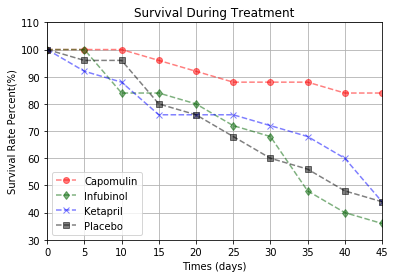

In [72]:
# Generate the Plot (Accounting for percentages)

# Save the Figure
ax=survive_rate_df.plot(kind='line', x='Timepoint',y='Capomulin_percent', linestyle='--', color='red', marker='o', alpha=0.5, label="Capomulin");
survive_rate_df.plot(kind='line', x='Timepoint', y='Infubinol_percent', linestyle='--', color='DarkGreen', marker='d', ax=ax, alpha=0.5, label="Infubinol");
survive_rate_df.plot(kind='line', x='Timepoint', y='Ketapril_percent', linestyle='--', color='blue', marker='x',  ax=ax,  alpha=0.5, label="Ketapril");
survive_rate_df.plot(kind='line', x='Timepoint', y='Placebo_percent', linestyle='--', color='black', marker='s', ax=ax,  alpha=0.5, label="Placebo");

ax.set_xlim(0, 45, 5)
ax.set_ylim(30, 110)
ax.grid()
ax.set_xlabel("Times (days)")
ax.set_ylabel("Survival Rate Percent(%)")
ax.set_title("Survival During Treatment")
legend = ax.legend(loc='best', shadow=True)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels )
plt.savefig("Survival_during_treatment.png")
plt.show()

# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [ ]:
# Calculate the percent changes for each drug

# Display the data to confirm



In [81]:
Capomulin_tumorvolume_changepercent=(tumor_response_df["Capomulin"].iloc[9]-tumor_response_df["Capomulin"].iloc[0])/tumor_response_df["Capomulin"].iloc[0]*100

Capomulin_tumorvolume_changepercent

-19.475302667894155

In [82]:
Infubinol_tumorvolume_changepercent=(tumor_response_df["Infubinol"].iloc[9]-tumor_response_df["Infubinol"].iloc[0])/tumor_response_df["Infubinol"].iloc[0]*100
Infubinol_tumorvolume_changepercent

46.12347172785184

In [83]:
Ketapril_tumorvolume_changepercent=(tumor_response_df["Ketapril"].iloc[9]-tumor_response_df["Ketapril"].iloc[0])/tumor_response_df["Ketapril"].iloc[0]*100
Ketapril_tumorvolume_changepercent

57.02879468660604

In [84]:
Placebo_tumorvolume_changepercent=(tumor_response_df["Placebo"].iloc[9]-tumor_response_df["Placebo"].iloc[0])/tumor_response_df["Placebo"].iloc[0]*100
Placebo_tumorvolume_changepercent

51.29796048315153

In [87]:
d = {'Capomulin': Capomulin_tumorvolume_changepercent, 'Infubinol': Infubinol_tumorvolume_changepercent, 'Ketapril': Ketapril_tumorvolume_changepercent, 'Placebo': Placebo_tumorvolume_changepercent}
totaltumor_volume_change = pd.Series(d)
totaltumor_volume_change

Capomulin   -19.475303
Infubinol    46.123472
Ketapril     57.028795
Placebo      51.297960
dtype: float64

In [88]:
drug=totaltumor_volume_change.keys()
drug

Index(['Capomulin', 'Infubinol', 'Ketapril', 'Placebo'], dtype='object')

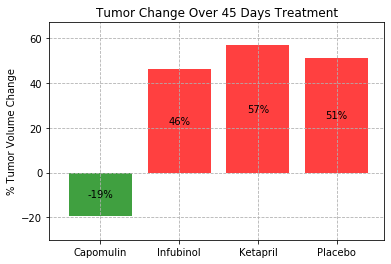

In [91]:
# Store all Relevant Percent Changes into a Tuple


# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure
ax = plt.subplot()

x_axis = np.arange(0, len(drug))
tick_locations = []
for x in x_axis:
    tick_locations.append(x + 0.4)

plt.title("Tumor Change Over 45 Days Treatment")
plt.ylabel("% Tumor Volume Change")

plt.xlim(-0.25, len(drug))
plt.ylim(-30, max(totaltumor_volume_change) + 10)
plt.grid(True, linestyle='dashed')

plt.xticks(tick_locations, drug)

width = 0.4
vals = [1,2,3,4,5]
colors = ['r','b','b','b','b']
colors = []
for value in totaltumor_volume_change:
    if value >= 0 :
        colors.append('r')
    else:
        colors.append('g')
percents=ax.bar(x_axis, totaltumor_volume_change, color=colors, alpha=0.75, align="edge")
def autolabel(percents, ax):

    (y_bottom, y_top) = ax.get_ylim()
    y_height = y_top - y_bottom
    for percent in percents:
        height = percent.get_height()
       
        ax.text(percent.get_x()+ percent.get_width()/2., 0.5*height, '%d' % int(height) +"%", ha='center', va='center')

autolabel(percents, ax)

plt.savefig("TumorChange_Over_45_Days_Treatment.png")
plt.show()


![Metastatic Spread During Treatment](../Images/change.png)